# SIFT (Scale-invariant feature transform)

SIFT helps locate the local features in an image, commonly known as the ‘keypoints‘ of the image. These keypoints are scale & rotation invariant that can be used for various computer vision applications, like image matching, object detection, scene detection, etc.

The major advantage of SIFT features, over edge features or hog features, is that they are not affected by the size or orientation of the image.

the entire process can be divided into 4 parts:

* Constructing a Scale Space: To make sure that features are scale-independent
* Keypoint Localisation: Identifying the suitable features or keypoints
* Orientation Assignment: Ensure the keypoints are rotation invariant
* Keypoint Descriptor: Assign a unique fingerprint to each keypoint

In [ ]:
!pip install skimage

  Using cached skimage-0.0.tar.gz (757 bytes)
ERROR: Could not find a version that satisfies the requirement skimage (from versions: 0.0)
ERROR: No matching distribution found for skimage


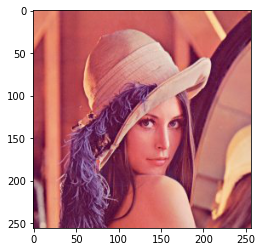

In [ ]:
import skimage
image = skimage.io.imread("/content/lena.jpg")
plt.imshow(image)

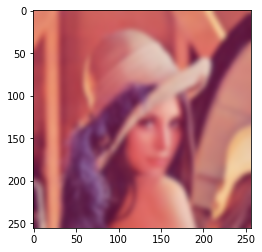

In [ ]:
from skimage import io,filters
from matplotlib import pyplot as plt

#We use the Gaussian Blurring technique to reduce the noise in an image.
#the Gaussian Blur calculates a value based on its neighboring pixels.
# apply Gaussian blur, creating a new image
blurred = skimage.filters.gaussian(
    image, sigma=(3, 3), truncate=3.5, multichannel=True)
plt.imshow(blurred)

We have created images of multiple scales (often represented by σ) and used Gaussian blur for each of them to reduce the noise in the image. Next, we will try to enhance the features using a technique called Difference of Gaussians or DoG.

## Keypoint Localization

The idea is to find the local maxima and minima for the images. This part is divided into two steps:

1. Find the local maxima and minima
2. Remove low contrast keypoints (keypoint selection)

## Orientation Assignment

we have a set of stable keypoints for the images. We will now assign an orientation to each of these keypoints so that they are invariant to rotation. We can again divide this step into two smaller steps:

1. Calculate the magnitude and orientation
2. Create a histogram for magnitude and orientation

The magnitude represents the intensity of the pixel and the orientation gives the direction for the same.

## Keypoint Descriptor

This is the final step for SIFT. So far, we have stable keypoints that are scale-invariant and rotation invariant. In this section, we will use the neighboring pixels, their orientations, and magnitude, to generate a unique fingerprint for this keypoint called a ‘descriptor’.

In [19]:
!pip3 install -U opencv-contrib-python==4.1.2.30

     |████████████████████████████████| 34.3 MB 83 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.5.3.56
    Uninstalling opencv-contrib-python-4.5.3.56:
      Successfully uninstalled opencv-contrib-python-4.5.3.56


In [21]:
pip install opencv-python

     |████████████████████████████████| 49.9 MB 16 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

#reading image
img1 = cv2.imread('/content/lena.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

# Feature Matching

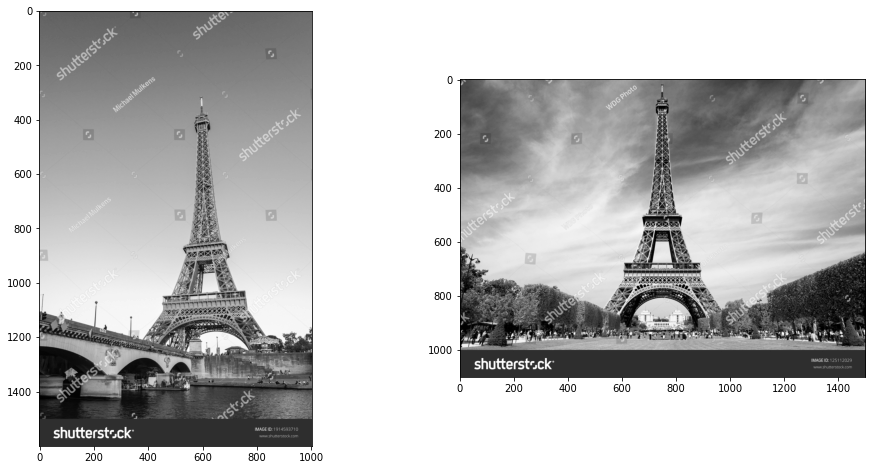

In [3]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('/content/img1.jpg')  
img2 = cv2.imread('/content/img2.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')